In [1]:
!pip install sklearn-selector-pipeline

In [9]:
from sklearn_selector_pipeline import FeatureSelectorClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, train_test_split

# Create synthetic data
X, y = make_classification(n_samples=10000, n_features=50,
                          n_informative=20, random_state=42)

# Compare models
rf_alone = RandomForestClassifier(random_state=42)

rf_wrapped = FeatureSelectorClassifier(
    feature_selector=SelectFromModel(
        RandomForestClassifier(n_estimators=50, random_state=42),
        threshold='median'  # Or try 'mean'
    ),
    classifier=RandomForestClassifier(random_state=42)
)

print("CV score of RF alone:", cross_val_score(rf_alone, X, y, cv=5).mean())
print("CV score of RF wrapped:", cross_val_score(rf_wrapped, X, y, cv=5).mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check how many features were selected
rf_wrapped.fit(X_train, y_train)
print("Features selected by rf_wrapped:", rf_wrapped.feature_selector_.get_support().sum())

CV score of RF alone: 0.9395
CV score of RF wrapped: 0.9494999999999999
Features selected by rf_wrapped: 25


In [11]:
from sklearn.metrics import confusion_matrix, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns

rf_alone.fit(X_train, y_train)

selected_features = rf_wrapped.feature_selector_.get_support().sum()
print(f"Original features: {X_train.shape[1]}")
print(f"Selected features: {selected_features}")
print(f"Feature reduction: {(1 - selected_features/X_train.shape[1])*100:.2f}%")

rf_alone_prediction = rf_alone.predict(X_test)
rf_wrapped_prediction = rf_wrapped.predict(X_test)

cm1 = confusion_matrix(y_test, rf_alone_prediction)
cm2 = confusion_matrix(y_test, rf_wrapped_prediction)

Original features: 50
Selected features: 25
Feature reduction: 50.00%


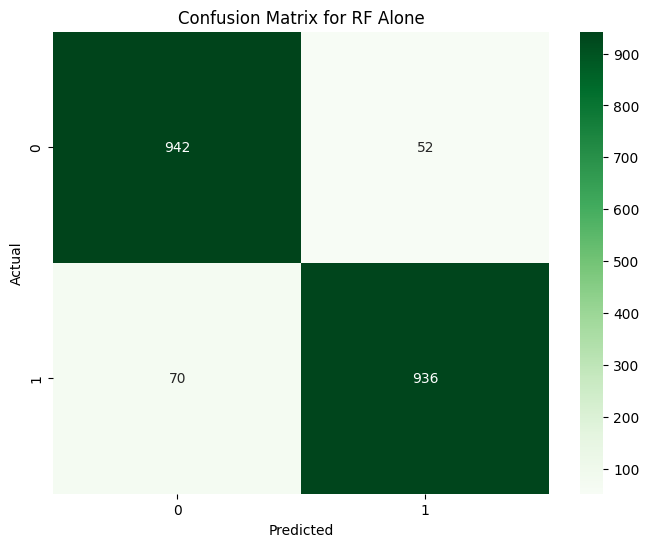

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for RF Alone')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

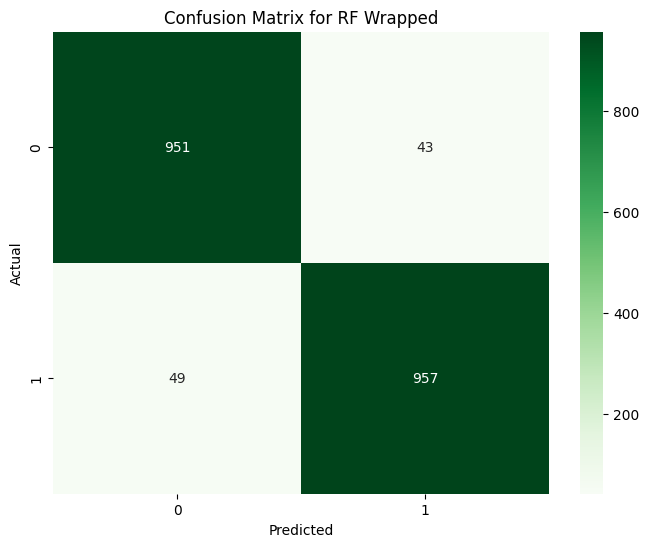

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix for RF Wrapped')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()